In [1]:
import json
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel

from matplotlib import pyplot as plt

In [2]:
with open('politics_tokens.json', 'r') as f:
    politics_tokens = json.load(f) 

In [3]:
politics_dictionary = Dictionary.load("stored_variables/politics_dictionary_lda")

In [4]:
politics_corpus = [politics_dictionary.doc2bow(text) for text in politics_tokens]

In [5]:
lda_model10 = LdaModel.load('lda_models/politics_lda10.model')

In [7]:
cm10 = CoherenceModel(model=lda_model10, corpus=politics_corpus, coherence='u_mass')

In [8]:
cm10.get_coherence()

-1.899906209016439

## Coherence versus number of topics

In [6]:
coherence_values = []


In [13]:
k_values = list(range(10, 51))

In [14]:
# don't run this: it might make the computer crash. instead, just load from the json file
for k in k_values:
    print(k)
    filename = 'lda_models/politics_lda' + str(k) + '.model'
    curr_lda_model = LdaModel.load(filename)
    curr_coherence_model = CoherenceModel(model = curr_lda_model, corpus = politics_corpus, coherence = 'u_mass')
    coherence_values.append(curr_coherence_model.get_coherence())
    with open('lda_coherence_vals.json', 'w') as f:
        json.dump(coherence_values, f)
        
    print(curr_coherence_model.get_coherence())

41
-3.3262278177180225
42
-3.355858475708823
43
-3.4165743804639606
44
-3.373171726554584
45
-3.4997242281289607
46
-3.302493307862298
47
-3.464685572268238
48
-3.4805365127208057
49
-3.480809221642469
50
-3.4527919508492193


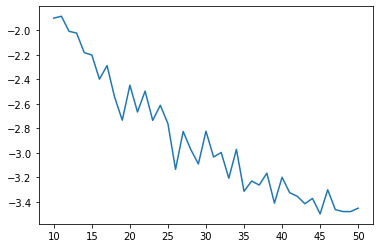

In [15]:
plt.plot(list(range(10,51)), coherence_values)
plt.show()

In [20]:
print(list(zip(list(range(10,51)), coherence_values)))

[(10, -1.899906209016439), (11, -1.8845427322819417), (12, -2.0072780766597025), (13, -2.0223148923068623), (14, -2.1819907125277305), (15, -2.2015190932703437), (16, -2.3987082387788567), (17, -2.2878020977379427), (18, -2.547110265387904), (19, -2.7339754686186057), (20, -2.4477845380604135), (21, -2.666816932416835), (22, -2.496284084725401), (23, -2.7354106461981935), (24, -2.6121860364123086), (25, -2.7622719943732643), (26, -3.1357063351028986), (27, -2.826058929053659), (28, -2.973019649449057), (29, -3.0916488364333103), (30, -2.8237698726489833), (31, -3.0349417600456214), (32, -2.997766880766342), (33, -3.208167811208787), (34, -2.9722279029374), (35, -3.314763738642629), (36, -3.230946374571985), (37, -3.2638090268628646), (38, -3.166750435070596), (39, -3.41159818944889), (40, -3.2000647914673435), (41, -3.3262278177180225), (42, -3.355858475708823), (43, -3.4165743804639606), (44, -3.373171726554584), (45, -3.4997242281289607), (46, -3.302493307862298), (47, -3.46468557226